# Explore the Impact of Location to Airbnb Price in New York City

## 1. Introduction

### 1.1 Background

Airbnb Inc. is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.\
\
Airbnb provides a platform for hosts to accommodate guests with short-term lodging and tourism-related activities. Guests can search for lodging using filters such as lodging type, dates, location, and price. Guests have the ability to search for specific types of homes, such as bed and breakfasts, unique homes, and vacation homes. Before booking, users must provide personal and payment information.Some hosts also require a scan of government-issued identification before accepting a reservation.Guests have the ability to chat with hosts through a secure messaging system.Hosts provide prices and other details for their rental or event listings, such as the allowed number of guests, home type, rules, and amenities. Pricing is determined by the host, with recommendations from Airbnb. Hosts and guests have the ability to leave reviews about the experience.\
\
In order to choose an apropriate listing price, Airbnb suggests to "search for comparable listings in your city or neighborhood to get an idea of market prices." So, the city or neighborhood, or in other word, the location is one of the determinant component of the price. 


### 1.2 Problem

Tourists might know in general that lodgings in Manhattan are more expensive than Queens, but there are 32 neighbourhoods in Manhattan, the lodging price of some are more expensive than others. By using Foresquare data, I would like to explore the vendors of the neighbourhoods in New York City, in order to find out which neighbourhoods are more expensive and why. By analyzing the New York City Airbnb data and Foursquare data, I am trying to find out the similarities of the neibourhoods and what features of the location might have impact on the Airbnb price.

## 1.3 Interests

This study will be a good support of Airbnb pricing strategy. For future listers, they will get a better idea of how much the location worth based on the surrounding vendors. Airbnb can also use the findings as part of their pricing suggestion. So even no comparable listings in the neibourhood exist, Airbnb will be able to suggest a price using the location data.

## 2. Data

The New York City Airbnb Open Data is from Kaggle.com. This dataset describes the listing activity and metrics in New Your city for 2019. This data file includes information about names, hosts, locations, availability, number of reviews etc. The vendor data will come from Foursquare.

In [1]:
import pandas as pd
df=pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
df.shape

(48895, 16)

The data set contains 48895 rows and 16 columns. Each row represents an Airbnb listing. The columns are:\
id:listing ID\
name:name of the listing\ 
host_id:host ID \
host_name:name of the host\
neighbourhood_group:location \
neighbourhood:area \
latitude:latitude coordinates \
longitude:longitude coordinates \
room_type:listing space type \
price:price in dollars \
minimum_nights:amount of nights minimum \
number_of_reviews:number of reviews \
last_review:latest review \
reviews_per_month:number of reviews per month \
calculated_host_listings_count:amount of listing per host \
availability_365:number of days when listing is available for booking

## 3. Methodology

In order to solve the problem, exploray analysis will firstly be applied to analyze each variable and the possible relations between some variables. Then, I will use regression model to assess the impact of related dependent variables to the target varible - price. After that, I will segment the listings basing on the price and location. Finally, I will use Foursquare location data to explore the venue differnces of the clusters.

### 3.1 Explorary Analysis

In [3]:
#import packages
import pandas as pd
import requests
import numpy as np # library to handle data in a vectorized manner

import json # library to handle JSON files

get_ipython().system

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!pip install folium
import folium # map rendering library

import matplotlib.pyplot as plt
import seaborn as sns 
print('all set')

all set


#### 3.1.1 Single Variables

In [4]:
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


There are 48895 Airbnb listings in New York City, listed by 11452 hosts.\
More than 50% of the hosts list only 1 space, but the host who lists the most spaces has 327 spaces.\
The listings are in 5 neighbourhood_groups, and 221 neighbourhoods.\
There are 3 room types. Entire home or apartment is the most listed room type. There are 25409 such listings.\
The average price of the listings is $153. The lowest priced listing asks for $0, but the highest one asks for $10,000.\
On average, the listings reqire 7 nights minimum. However, 50% of them reqire only 3 days or less. The longest minimum nights requirements is 1250 nights.\
Each listing has 23 reviews on average. 25% of listings have only 1 or 0 review. 50% of listings have 5 or less reviews. The listing with the most reviews has 629 reviews.\
On average, each listing has 1.37 reviews per months.\
The dataset contains reviews posted no later than June 23rd, 2019.\
On average, the listings are avaible 112 days in a year. From the variable 'availability_365' we can see， more than 25% of listings in the dataset has 0 available days. But some of them are avaiable all the 365 days.

In [5]:
# Check how many listings in each town
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [6]:
# Check how many listings for each room type
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

#### 3.1.2 Price and Room Types

In [7]:
#check the average price of each room type
df.groupby('room_type').mean().sort_values('price',ascending=False)['price']

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

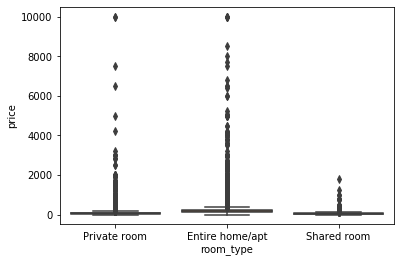

In [8]:
#check the distribution of price for each room type
#observation: the prices of Entire home/apt are more distributed than the other 2 space types.
sns.boxplot(x='room_type',y='price',data=df)

The average price for Entire home/apt is more higher than Private roon and Shared room. Also, the diviation of Entire home/apt is the highest, too. The Share room is the least expensive room type, and the prices of such room is the least distributed.

#### 3.1.3 Price and Reviews

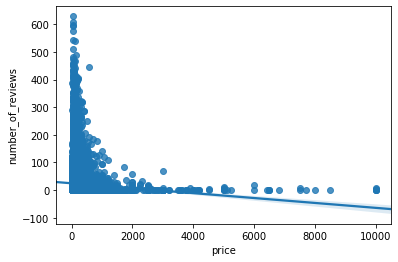

In [9]:
#check how price and reviews are related
sns.regplot(x='price',y='number_of_reviews',data=df)

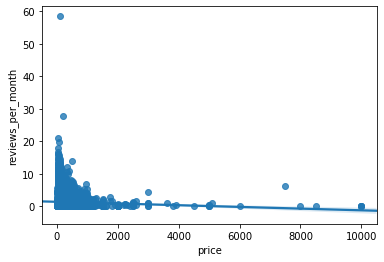

In [10]:
sns.regplot(x='price',y='reviews_per_month',data=df)

In [11]:
df[['price','number_of_reviews','reviews_per_month']].corr()

,price,number_of_reviews,reviews_per_month
price,1.000000,-0.047954,-0.030608
number_of_reviews,-0.047954,1.000000,0.549868
reviews_per_month,-0.030608,0.549868,1.000000


In general, the number of reviews slowly decreases as the listing price increases. However, the correlation is very insignificant. 

#### 3.1.4 Price and Neighbourhood

In [12]:
df.groupby('neighbourhood').mean().sort_values('price',ascending=False)['price']

neighbourhood
Fort Wadsworth        800.000000
Woodrow               700.000000
Tribeca               490.638418
Sea Gate              487.857143
Riverdale             442.090909
Prince's Bay          409.500000
Battery Park City     367.557143
Flatiron District     341.925000
Randall Manor         336.000000
NoHo                  295.717949
SoHo                  287.103352
Midtown               282.719094
Neponsit              274.666667
West Village          267.682292
Greenwich Village     263.405612
Chelsea               249.738544
Willowbrook           249.000000
Theater District      248.013889
Nolita                230.138340
Financial District    225.490591
Gramercy              222.754438
Little Italy          222.066116
Murray Hill           220.958763
Breezy Point          213.333333
Cobble Hill           211.929293
Upper West Side       210.918316
Brooklyn Heights      209.064935
Hell's Kitchen        204.794178
Kips Bay              202.408511
DUMBO                 196.305

The neighbourhood with the highest average listing price is Fort Wadsworth, with an average listing price of $800. The neighbourhood with the lowest average listing price is Bull's Head. The average price is $47. 

#### 3.1.5 Price, Room Type and Neighhourhood

In [13]:
#calculate average room price for each neighbourhood
neighbourhood=df.groupby(['neighbourhood','room_type'])
df_new3=neighbourhood.mean()
Room_price=pd.pivot_table(df_new3,values='price',index='neighbourhood',columns='room_type')
df_room_price=pd.DataFrame(Room_price.to_records())
df_room_price.columns=['neighbourhood','Entire home/apt_avg price','Private room_avg price','Shared room_avg price']
df_room_price=df_room_price.set_index('neighbourhood')
df_room_price.sort_values('Entire home/apt_avg price',ascending=False)

,Entire home/apt_avg price,Private room_avg price,Shared room_avg price
neighbourhood,,,
Fort Wadsworth,800.000000,NaN,NaN
Woodrow,700.000000,NaN,NaN
Randall Manor,651.000000,56.888889,13.000000
Sea Gate,649.400000,84.000000,NaN
Tribeca,561.818182,191.264706,NaN
Prince's Bay,506.666667,118.000000,NaN
Battery Park City,488.541667,105.904762,55.000000
Flatiron District,388.000000,142.266667,NaN
SoHo,365.618257,124.991304,147.500000


Not all the neighbourhoods has all the three types of rooms. For example. the top 2 neighbourhoods(Fort Wadsworth, Woodrow, Randall Manor) has only entire home/apt listing, while Breezy Point, Bull's head, Co-op city, Holliswood and Olinville do not have any entire hoom/apt listing.
The For Wadsworth still list top 1. However, Bull's Head might not be the least expensive neighbourhood. For the same room type ('Private room), Bronxdale, Arden Heights, Grant City and Soundview list even lower than Bull's Head.

### 3.2 Linear Regression Model

I will use .... to fit a regression model to the dataset. In order to do so, I will firstly convert neighbourhood_group and room_type to dummy variables.

#### 3.2.1 Data Cleaning

In [14]:
#convert neighbourhood_group and room_type to dummy variables and add the variables to the original space dataframe.
#df_new is the space dataframe with neighbour_group and room_type dummies
df_neigh=pd.get_dummies(df['neighbourhood_group'])
df_room=pd.get_dummies(df['room_type'])
df_new=df.join(df_neigh)
df_new=df_new.join(df_room)
df_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,6,365,0,1,0,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2,355,0,0,1,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,1,365,0,0,1,0,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,1,194,0,1,0,0,0,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,1,0,0,0,1,0,0,1,0,0


#### 3.2.2 Model development

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm1=LinearRegression()
Y1=df_new['price']
X1=df_new[['minimum_nights',
          'calculated_host_listings_count',
          'availability_365','Bronx','Brooklyn',
          'Manhattan',
          'Queens',
          'Staten Island',
          'Entire home/apt',
          'Private room',
          'Shared room'
         ]]

In [17]:
#Split the dataset into training set and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X1, Y1, test_size=0.1, random_state=1)
print('number of test samples:', x_test.shape[0])
print('number of training samples:', x_train.shape[0])

number of test samples: 4890
number of training samples: 44005


In [18]:
#fitting the model using training set
lm1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Intercept
lm1.intercept_

78.99587185579027

In [20]:
# Coefficients
lm1.coef_

array([-1.40172553e-02, -6.28391730e-02,  1.61351922e-01, -2.88624157e+01,
        4.29296963e+00,  5.99023900e+01, -1.57681316e+01, -1.95648123e+01,
        8.49664979e+01, -2.73360237e+01, -5.76304741e+01])

So the coefficients for each variables are: \
'minimum_nights': -0.014\ 
'calculated_host_listings_count': -0.063 \
'availability_365': 0.161\
'Bronx': -28.862\
'Brooklyn': 4.293\
'Manhattan': 59.902\
'Queens': -15.768\
'Staten Island': -19.565\
'Entire home/apt': 84.967\
'Private room': -27.336\
'Shared room': -57.630\
### The location and room type have significant impact on the price than other variables.

### 3.3 Cluster Analysis

#### 3.3.1 Data cleaning
I will focus the study on Manhattan. Also, to eliminate the impact of room type, I will use the listings of Entire room/apt only in the study.

In [70]:
df1=df[df['neighbourhood_group']=='Manhattan'] #select listings in Manhattan only
df2=df1[df1['room_type']=='Entire home/apt'] #select listings for Entire room/apt only
df2.shape

(13199, 16)

In [71]:
df3=df2[['id','neighbourhood','price']] #only neighbourhood and price for modeling
#convert neighbourhoods to dummy variables
df_neigh=pd.get_dummies(df3['neighbourhood'])
df_new=df3.join(df_neigh)
df_new2=df_new.drop('neighbourhood',axis=1)
df4=df_new2.set_index('id')
#df4 is the dataset for clustering
df4.head()

,price,Battery Park City,Chelsea,Chinatown,Civic Center,East Harlem,East Village,Financial District,Flatiron District,Gramercy,...,Roosevelt Island,SoHo,Stuyvesant Town,Theater District,Tribeca,Two Bridges,Upper East Side,Upper West Side,Washington Heights,West Village
id,,,,,,,,,,,,,,,,,,,,,
2595,225,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5022,80,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5099,200,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5238,150,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5295,135,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### 3.3.3 Clustering

In [72]:
#Find the best K
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k,random_state=0)
    km = km.fit(df4)
    Sum_of_squared_distances.append(km.inertia_)

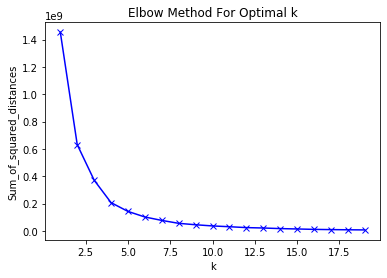

In [73]:
#plot the sum of squared distances of k=1-20, in order to find the optimized k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### As the elbow in k=4, so 4 is the optimized number of clusters

In [74]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df4)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [75]:
#adding cluster numbers to the Manhattan Entire room/apt dataframe
df2.insert(1, 'Cluster', kmeans.labels_)
df2['Cluster'].value_counts() #check number of listings in each cluster

0    12139
2      983
1       64
3       13
Name: Cluster, dtype: int64

In [96]:
df2.groupby('Cluster').mean()['price']

Cluster
0     195.200511
1    2697.968750
2     662.998983
3    7366.923077
Name: price, dtype: float64

## 4 Results

In [79]:
#Break up 4 clusters in to 4 dataframes
Cluster0=df2[df2['Cluster']==0]
Cluster1=df2[df2['Cluster']==1]
Cluster2=df2[df2['Cluster']==2]
Cluster3=df2[df2['Cluster']==3]

### 4.1 Features of each cluster

#### 4.1.1 Cluster 0

In [80]:
Cluster0.describe()

,id,Cluster,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.213900e+04,12139.0,1.213900e+04,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,9289.000000,12139.000000,12139.000000
mean,1.845998e+07,0.0,6.319686e+07,40.759106,-73.977763,195.200511,10.729385,18.243266,1.123236,19.053217,111.965730
std,1.129937e+07,0.0,7.700784e+07,0.034832,0.021089,77.889392,27.213064,37.279390,1.417697,60.273949,132.792076
min,2.595000e+03,0.0,2.845000e+03,40.702340,-74.018290,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.747020e+06,0.0,7.379970e+06,40.730475,-73.993705,139.000000,2.000000,1.000000,0.160000,1.000000,0.000000
50%,1.859216e+07,0.0,2.640509e+07,40.755080,-73.982500,180.000000,3.000000,4.000000,0.500000,1.000000,33.000000
75%,2.942143e+07,0.0,9.552364e+07,40.779985,-73.961170,245.000000,8.000000,16.000000,1.580000,2.000000,234.000000
max,3.648543e+07,0.0,2.743115e+08,40.876650,-73.908550,429.000000,1250.000000,403.000000,12.000000,327.000000,365.000000


There are 12139 listings in cluster 0.\
The average price of listings in cluster 0 is $195, with a minimum of $1, and a maximun of $1250.


In [109]:
# create map
latitude=40.7831
longitude=-73.9712
Cluster0_sample=Cluster0.sample(100)

map_cluster0 = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Cluster0_sample['latitude'], Cluster0_sample['longitude'], Cluster0_sample['name'], Cluster0_sample['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_cluster0)
       
map_cluster0

#### 4.1.2 Cluster 1

In [84]:
Cluster1.describe()

,id,Cluster,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.400000e+01,64.0,6.400000e+01,64.000000,64.000000,64.00000,64.000000,64.000000,35.000000,64.000000,64.000000
mean,1.759068e+07,1.0,7.611952e+07,40.752932,-73.987058,2697.96875,11.968750,8.359375,0.626286,3.203125,186.937500
std,1.197014e+07,0.0,8.610869e+07,0.027809,0.015146,812.86579,17.726286,16.551380,0.858319,3.916508,146.403213
min,1.749660e+05,1.0,2.132660e+05,40.713210,-74.017580,1731.00000,1.000000,0.000000,0.030000,1.000000,0.000000
25%,5.406699e+06,1.0,5.825419e+06,40.732343,-73.998375,2000.00000,1.000000,0.000000,0.155000,1.000000,0.000000
50%,1.760210e+07,1.0,3.144470e+07,40.748715,-73.987410,2500.00000,2.000000,1.000000,0.350000,1.000000,180.000000
75%,3.010503e+07,1.0,1.489182e+08,40.773170,-73.979605,3000.00000,30.000000,8.250000,0.780000,3.000000,361.250000
max,3.618926e+07,1.0,2.721663e+08,40.825110,-73.949610,5000.00000,90.000000,84.000000,4.360000,12.000000,365.000000


There are 64 listings in Cluster 1.\
The average listing price of cluster 1 is $2698, with a minimum of $1731, and a maximum of $5000.

In [110]:
# create map
latitude=40.7831
longitude=-73.9712

map_cluster1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Cluster1['latitude'], Cluster1['longitude'], Cluster1['name'], Cluster1['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_cluster1)
       
map_cluster1

#### 4.1.3 Cluster 2

In [87]:
Cluster2.describe()

,id,Cluster,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9.830000e+02,983.0,9.830000e+02,983.000000,983.000000,983.000000,983.000000,983.000000,639.000000,983.000000,983.000000
mean,2.127626e+07,2.0,9.435931e+07,40.748390,-73.985625,662.998983,7.907426,13.363174,1.441784,18.543235,175.323499
std,1.186455e+07,0.0,9.311031e+07,0.025452,0.017108,235.269449,14.869856,29.225462,1.536302,62.011873,136.171171
min,2.368600e+04,2.0,8.730000e+03,40.704210,-74.018370,430.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.814836e+06,2.0,1.062969e+07,40.728360,-73.999130,499.000000,2.000000,0.000000,0.310000,1.000000,22.000000
50%,2.347858e+07,2.0,5.053940e+07,40.746160,-73.988250,595.000000,3.000000,2.000000,0.860000,1.000000,180.000000
75%,3.223086e+07,2.0,1.987641e+08,40.762080,-73.974550,750.000000,5.000000,12.000000,2.215000,2.000000,301.500000
max,3.645090e+07,2.0,2.736192e+08,40.849560,-73.932710,1600.000000,180.000000,447.000000,14.000000,327.000000,365.000000


There are 983 listings in Cluster 2.\
The average listing price of cluster 1 is $663, with a minimum of $430, and a maximum of $1600.

In [111]:
# create map
latitude=40.7831
longitude=-73.9712
Cluster2_sample=Cluster2.sample(100)

map_cluster2 = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Cluster2_sample['latitude'], Cluster2_sample['longitude'], Cluster2_sample['name'], Cluster2_sample['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_cluster2)
       
map_cluster2

#### 4.1.3 Cluster 3

In [90]:
Cluster3.describe()

,id,Cluster,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.300000e+01,13.0,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000,4.000000,13.000000,13.000000
mean,2.159896e+07,3.0,5.975698e+07,40.746637,-73.985901,7366.923077,25.000000,1.615385,0.367500,3.153846,206.538462
std,1.243263e+07,0.0,8.477320e+07,0.029563,0.023388,1768.522192,48.392493,4.664377,0.434156,4.160251,162.441587
min,2.110145e+06,3.0,1.235070e+06,40.711620,-74.016930,5100.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,1.252007e+07,3.0,3.750764e+06,40.719800,-74.003880,6000.000000,1.000000,0.000000,0.140000,1.000000,45.000000
50%,2.278010e+07,3.0,1.610531e+07,40.744820,-73.986650,6800.000000,5.000000,0.000000,0.225000,1.000000,251.000000
75%,3.300761e+07,3.0,7.239039e+07,40.772130,-73.978480,8500.000000,30.000000,1.000000,0.452500,2.000000,364.000000
max,3.605681e+07,3.0,2.712487e+08,40.792640,-73.938980,10000.000000,180.000000,17.000000,1.000000,12.000000,365.000000


There are only 13 listings in Cluster 3.\
The average listing price of cluster 3 is $7367, with a minimum of $5100, and a maximum of $10000.

In [115]:
# create map
latitude=40.7831
longitude=-73.9712

map_cluster3 = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Cluster3['latitude'], Cluster3['longitude'], Cluster3['name'], Cluster3['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_cluster3)
       
map_cluster3

### 4.2 Common Vendor Explore

In [97]:
# get Foursquare credentails
CLIENT_ID = 'KMWBOS1CKDOFUGS1QVIO3TQLFWNYUXX4MUXAMGUKM5VJXEK1' # your Foursquare ID
CLIENT_SECRET = 'XSOUSPJ4WVYLJJSRMJJONMSN1PMSJC5SCPZ3NSLZXKX5DP1Z' # your Foursquare Secret
VERSION = '20180909' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KMWBOS1CKDOFUGS1QVIO3TQLFWNYUXX4MUXAMGUKM5VJXEK1
CLIENT_SECRET:XSOUSPJ4WVYLJJSRMJJONMSN1PMSJC5SCPZ3NSLZXKX5DP1Z


In [98]:
#defind a function to get the nearby vendors of a location. 
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['id', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    return(nearby_venues)

#### 4.2.1 The most  expensive cluster: Cluster 3

In [ ]:
LIMIT=100
radius=500

In [99]:
Cluster3_venues = getNearbyVenues(names=Cluster3['name'],
                                   latitudes=Cluster3['latitude'],
                                   longitudes=Cluster3['longitude']
                                  )

UWS 1BR w/backyard + block from CP
SuperBowl Penthouse Loft 3,000 sqft
Spanish Harlem Apt
Luxury townhouse Greenwich Village
1-BR Lincoln Center
East 72nd Townhouse by (Hidden by Airbnb)
Park Avenue Mansion by (Hidden by Airbnb)
Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho
2br - The Heart of NYC: Manhattans Lower East Side
70' Luxury MotorYacht on the Hudson
Midtown Manhattan great location (Gramacy park)
3000 sq ft daylight photo studio
Luxury TriBeCa Apartment at an amazing price


We noticed that 3,000 sqft, Mansion, Soho, Luxury etc. 

In [102]:
Cluster3_top10=Cluster3_venues['Venue Category'].value_counts().head(10)
Cluster3_top10

Coffee Shop           62
Italian Restaurant    51
Art Gallery           45
Café                  31
Hotel                 30
Bakery                29
Park                  29
Gym                   28
Wine Shop             24
Pizza Place           24
Name: Venue Category, dtype: int64

#### 4.2.2. Second expensive cluster: Cluster 1

In [103]:
Cluster1_sample=Cluster1.sample(13)
Cluster1_venues = getNearbyVenues(names=Cluster1_sample['name'],
                                   latitudes=Cluster1_sample['latitude'],
                                   longitudes=Cluster1_sample['longitude']
                                  )

4-Floor Unique Event Space 50P Cap. - #10299B
NYC HOLIDAY!!!!   April 15- May 15
Amazing Chelsea 4BR Loft!
Harrison Green by (Hidden by Airbnb)
Beautiful 2000 sq. ft. loft in Hells Kitchen NYC
Lux 2Bed/2.5Bath Central Park View!
Chelsea Gallery for events, exhibitions, fashion
Greenwich Village Townhome with Private Garden!
ART LOFT/HOME:  DINNERS, GATHERINGS, PHOTO
3 Bedroom Apartment
Breathtaking City Views 3 Bed Apt. in Lincoln Sq!
West Village Penthouse-terrace/view
Prime Location!Cozy 2BR in West Village!


In [104]:
Cluster1_top10=Cluster1_venues['Venue Category'].value_counts().head(10)
Cluster1_top10

Italian Restaurant      67
Art Gallery             55
Coffee Shop             39
American Restaurant     35
Gym / Fitness Center    35
Pizza Place             27
Cocktail Bar            25
Ice Cream Shop          24
Theater                 24
Café                    24
Name: Venue Category, dtype: int64

#### 4.2.3 Third expensive cluster: Cluster 2

In [105]:
Cluster2_sample=Cluster2.sample(13)
Cluster2_venues = getNearbyVenues(names=Cluster2_sample['name'],
                                   latitudes=Cluster2_sample['latitude'],
                                   longitudes=Cluster2_sample['longitude']
                                  )

Prime Location 3 Bedrroms Apartment
Bluebird Hell's Kitchen 1-BR + Killer City Views
Spacious Bright 1 Bedroom East Village Apartment
“Epic” The highest apartment in New York
Floor 35th in the heart of New York
Brand New 3-Bedroom in Trendy L.E.S. #10296
Spacious, Modern Times Square 3Bdrm *****
FLATIRON""GRAND PANORAMA""LUXURY~3 BR W/Roof Deck
LUXURY 2 BR ON WEST 48TH ST-POOL/GYM/CLUB HOUSE
*NO GUEST SERVICE FEE* Beekman Tower One Bedroom Suite  #8
2 bedrooms 5-star building midtown 
Wyndham Midtown 45 New York City 1 BR Apt w/View
Serviced townhouse with backyard & terrace in NYC


In [106]:
Cluster2_top10=Cluster2_venues['Venue Category'].value_counts().head(10)
Cluster2_top10

Theater                55
Hotel                  51
Italian Restaurant     48
Coffee Shop            47
Japanese Restaurant    31
Pizza Place            30
American Restaurant    28
Gym                    27
Indian Restaurant      23
Bar                    23
Name: Venue Category, dtype: int64

#### 4.2.4 The least expensive cluster: Cluster 0

In [107]:
Cluster0_sample=Cluster0.sample(13)
Cluster0_venues = getNearbyVenues(names=Cluster0_sample['name'],
                                   latitudes=Cluster0_sample['latitude'],
                                   longitudes=Cluster0_sample['longitude']
                                  )

Beautiful East Village Apartment
Cozy, Centrally Located Upper East Side Flat
Spacious 2 Bedroom apartment in Washington Heights
Posh 1BR in Midtown East by Sonder
Beautiful Exposed Brick Studio Loft
Affordable Luxury & Comfort in Manhattan. For 5.
Cozy Studio in East Village
Gorgeous 1 Bedroom NYC + W/D in the Unit
Harlem Gem
Cute Apartment in Hell's Kitchen
Cosy 2-bedroom apartment on UES/East Harlem
COSY 2BR APARTMENT IN LOWER EAST SIDE
Exposed brick 1BR apartment in upper Manhattan


In [108]:
Cluster0_top10=Cluster0_venues['Venue Category'].value_counts().head(10)
Cluster0_top10

Pizza Place             32
Coffee Shop             32
Italian Restaurant      31
Bar                     27
Mexican Restaurant      26
Bakery                  24
Theater                 23
Gym                     22
Hotel                   21
Gym / Fitness Center    20
Name: Venue Category, dtype: int64

## 5.Discussion 

From the analysis of common vendors of each neighbourhood, we can get some rules of the pricing of New York City Airbnb:\
Rule 1: Art Galary can be an indicator of expensive Airbnb rooms.\
Rule 2: In expensive clusters, the vendors are more concentrated. \
Rule 3: Wine shops/cocktail bars are near expensive listings.\

Other than the location, we also noticed, from the name of the listings, the home type or sqft can be another variable that significantly affact the listing price.

## 6. Conclusion

1. location has strong impact on the Airbnb price, but more detailed than the neighbourhood.
2. In Manhattan, expensive Airbnb and less expensive ones are mixed. 
3. Expensive Airbnb listings can be find near Art Galary, Wine shop or cocktail bars.
4. Other than the location, home type (n room n bath), and sqft can be another strong impact on the price.

Further study:\
1. explore the other room type: private room and shared room
2. explore other towns (neighbourhood_group)
3. adding home type and sqft data, and see how they, combined with the location, impact the price.
    